In [ ]:
from zipfile import ZipFile
file_name = "digit-recognizer.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# MNIST dataset downloaded from Kaggle : 
#(https://www.kaggle.com/c/digit-recognizer/data)

# See tutorial: https://github.com/ranasingh-gkp/PCA-TSNE-on-MNIST-dataset/blob/master/14_15_16(PCA%2CT_SNE).ipynb

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('train.csv')

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
labels = l#.head(15000)
data = d#.head(15000)

In [ ]:
# Data-preprocessing: Standardizing the data
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

sample_data = standardized_data

(42000, 784)


In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (42000, 2)


In [ ]:
# Determine the loss of PCA

print(pca_data.shape)

invers = pca.inverse_transform(pca_data)
X_projected2 = pca_data.dot(pca.components_) + pca.mean_

loss = np.sum((data - invers) ** 2, axis=1).mean()

print(loss)

(42000, 2)
5716956.7958491845


In [ ]:
#import matplotlib.pyplot as plt



#plt.figure(figsize=(28,28))
#for i in range(5):
#  plt.subplot(4,5,i+1)
#  print(X_projected2.shape)
#  plt.imshow(X_projected2, cmap='gray')
#  plt.axis('off')
#plt.show()

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

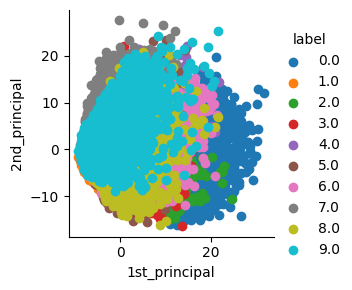

In [ ]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt


pca_data.reshape((1, 1))


plt.figure(figsize=(28,28))
for i in range(5):
  plt.subplot(4,5,i+1)
  print(X_projected2.shape)
  plt.imshow(d0[i], cmap='gray')
  plt.axis('off')
plt.show()

ValueError: ignored